In [601]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [603]:
#Read in the csv file and convert to a Pandas dataframe
data_2015 = pd.read_csv('2015.csv')
data_2016 = pd.read_csv('2016.csv')
data_2017 = pd.read_csv('2017.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [605]:
shapes = {
    '2015': data_2015.shape,
    '2016': data_2016.shape,
    '2017': data_2017.shape
}

shapes

{'2015': (158, 12), '2016': (157, 13), '2017': (155, 12)}

In [606]:
data_2015.head()# - 12 colomn

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [607]:
data_2016.head() # - 13 colomn

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [608]:
data_2017.head() # - 12 colomn

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [610]:
print("\n*****2015***** \n\n")
print(data_2015.info())
print("\n*****2016***** \n\n")
print(data_2016.info())
print("\n*****2017***** \n\n")
print(data_2017.info())


*****2015***** 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object

In [611]:
print("\n*****2015***** \n\n")
data_2015.describe(include ='object')


*****2015***** 




,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


In [612]:
print("\n*****2016***** \n\n")
data_2016.describe(include ='object')


*****2016***** 




,Country,Region
count,157,157
unique,157,10
top,Denmark,Sub-Saharan Africa
freq,1,38


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

In [614]:
print("\n*****2017***** \n\n")
data_2017.describe(include ='object')


*****2017***** 




,Country
count,155
unique,155
top,Norway
freq,1


In [615]:
print("\n*****2015***** \n\n")
print(data_2015.dtypes)
print("\n*****2016***** \n\n")
print(data_2016.dtypes)
print("\n*****2017***** \n\n")
print(data_2017.dtypes)


*****2015***** 


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

*****2016***** 


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Gener

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

- My Data Sets are reliable because i take it from trusted source which is Kaggle

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

- My Data Sets are not up-to-date 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


- All Colomns in my DataSets are have the same Data type - this is mean my DS is achive the Consistency

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [624]:
# Rename columns for consistency across datasets
data_2017.columns=['Country','Happiness Rank','Happiness Score','Whisker high','Whisker low','Economy (GDP per Capita)','Family','Health (Life Expectancy)'
                   ,'Freedom','Generosity','Trust (Government Corruption)','Dystopia Residual']
data_2017.head(2)

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [625]:
# Create a mapping of countries to regions from data_2015 and data_2016
country_region_mapping_2015 = data_2015[['Country', 'Region']].drop_duplicates()
country_region_mapping_2016 = data_2016[['Country', 'Region']].drop_duplicates()

# Combine the country-region mapping from both datasets and remove duplicates
combined_country_region_mapping = pd.concat([country_region_mapping_2015, country_region_mapping_2016]).drop_duplicates()

# Update data_2017 directly by adding the 'Region' column
data_2017 = pd.merge(data_2017, combined_country_region_mapping, on='Country', how='left')
columns_order = ['Country', 'Region'] + [col for col in data_2017.columns if col not in ['Country', 'Region']]
data_2017 = data_2017[columns_order]

# Now data_2017 has the region information


In [626]:
data_2017.head()

,Country,Region,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [627]:
data_2015[data_2015['Country'] == 'Burundi']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.0153,0.41587,0.22396,0.1185,0.10062,0.19727,1.83302


In [630]:
data_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [631]:
data_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [632]:
data_2017.isnull().sum()

Country                          0
Region                           2
Happiness Rank                   0
Happiness Score                  0
Whisker high                     0
Whisker low                      0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64

In [633]:
data_2017["Happiness Rank"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155],
      dtype=int64)

In [634]:
data_2015["Happiness Rank"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158], dtype=int64)

In [635]:
data_2016["Happiness Rank"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157], dtype=int64)

In [636]:
data_2017.head(2)

,Country,Region,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [637]:
value_counts = {
  '2015': data_2015['Country'].value_counts().sum(),
  '2016': data_2016['Country'].value_counts().sum(),
  '2017': data_2017['Country'].value_counts().sum(),
}

value_counts

{'2015': 158, '2016': 157, '2017': 155}

In [638]:
unique = {
    '2015': data_2015['Country'].unique(),
    '2016': data_2016['Country'].unique(),
    '2017': data_2017['Country'].unique(),
}

unique

{'2015': array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
        'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
        'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
        'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
        'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
        'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
        'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
        'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
        'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
        'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
        'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
        'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
        'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
        'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
     

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [641]:
duplicates = {
    '2015': data_2015.duplicated().sum(),
    '2016': data_2016.duplicated().sum(),
    '2017': data_2017.duplicated().sum(),
}

duplicates

{'2015': 0, '2016': 0, '2017': 0}

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [643]:
#Display number missing values per column


In [644]:
# go to clean them 
# Check for missing values in the 2015 dataset
missing_2015 = data_2015.isnull().sum()

# Check for missing values in the 2016 dataset
missing_2016 = data_2016.isnull().sum()

# Check for missing values in the 2017 dataset
missing_2017 = data_2017.isnull().sum()


print("\nMissing values in 2015 dataset:\n", missing_2015)
print("\nMissing values in 2016 dataset:\n", missing_2016)
print("\nMissing values in 2017 dataset:\n", missing_2017)



Missing values in 2015 dataset:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Missing values in 2016 dataset:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Missing values in 2017 dataset

In [645]:
data_2017['Region'].fillna('Unknown!', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4784\3012876733.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_2017['Region'].fillna('Unknown!', inplace=True)


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [647]:
# check columns types 
dtypes = {
    '2015': data_2015.dtypes,
    '2016': data_2016.dtypes,
    '2017': data_2017.dtypes,
}
dtypes

{'2015': Country                           object
 Region                            object
 Happiness Rank                     int64
 Happiness Score                  float64
 Standard Error                   float64
 Economy (GDP per Capita)         float64
 Family                           float64
 Health (Life Expectancy)         float64
 Freedom                          float64
 Trust (Government Corruption)    float64
 Generosity                       float64
 Dystopia Residual                float64
 dtype: object,
 '2016': Country                           object
 Region                            object
 Happiness Rank                     int64
 Happiness Score                  float64
 Lower Confidence Interval        float64
 Upper Confidence Interval        float64
 Economy (GDP per Capita)         float64
 Family                           float64
 Health (Life Expectancy)         float64
 Freedom                          float64
 Trust (Government Corruption)    float64
 G

- All the colomns have the same DataTypes

In [649]:
# go to clean them 


In [650]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [652]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [653]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [654]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Outlier for Happiness Score


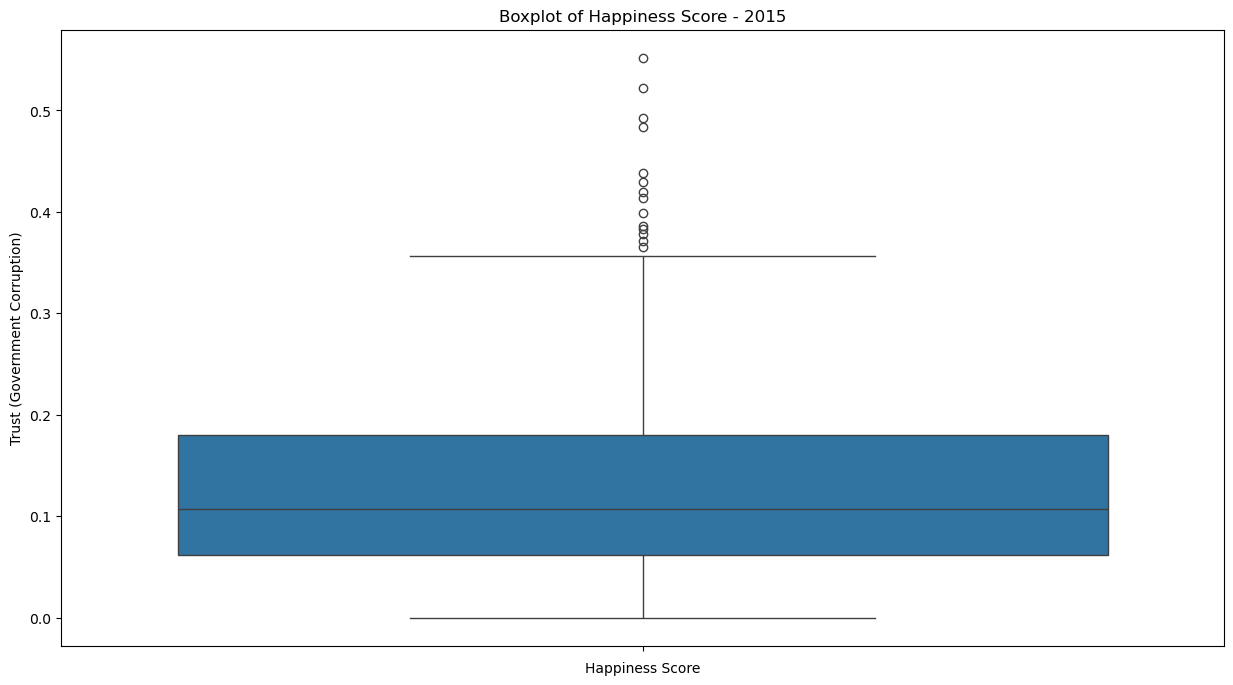

In [656]:
# Importing necessary library for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

sns.boxplot(
    data_2015,
    y="Trust (Government Corruption)",
    #hue="Category"
)
plt.title('Boxplot of Happiness Score - 2015')
plt.xlabel('Happiness Score')
plt.show()

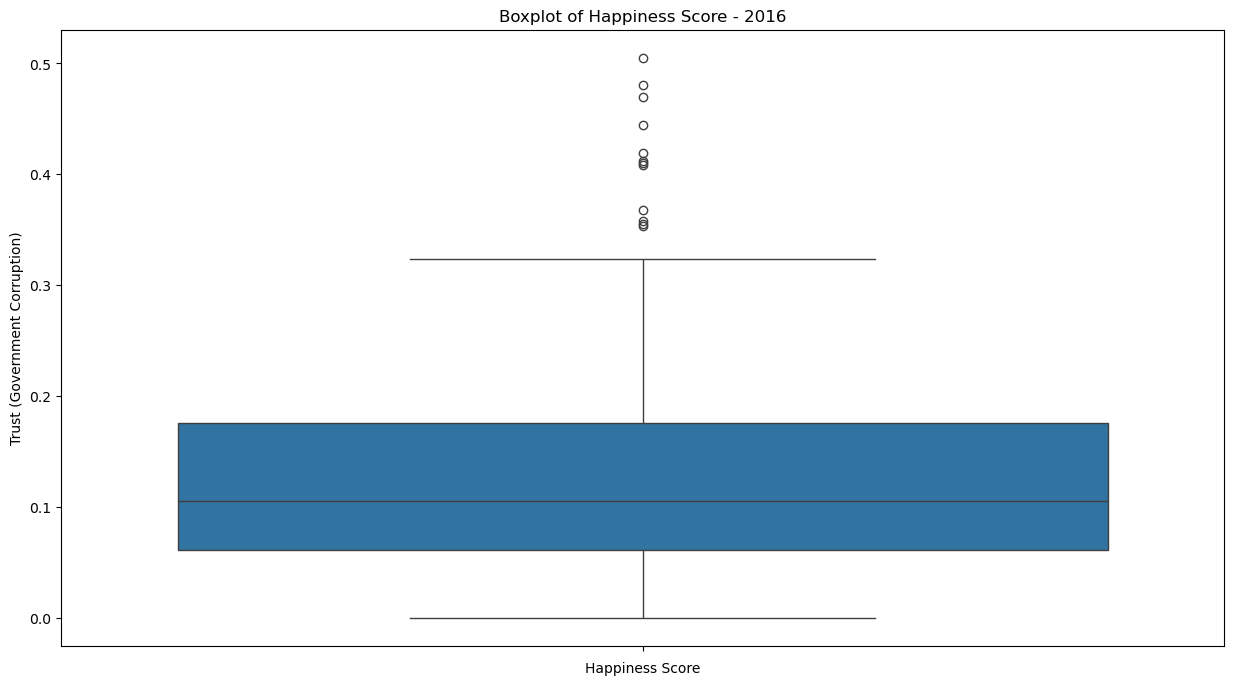

In [657]:
# Importing necessary library for visualization
plt.figure(figsize=(15,8))

sns.boxplot(
    data_2016,
    y="Trust (Government Corruption)",
)
plt.title('Boxplot of Happiness Score - 2016')
plt.xlabel('Happiness Score')
plt.show()

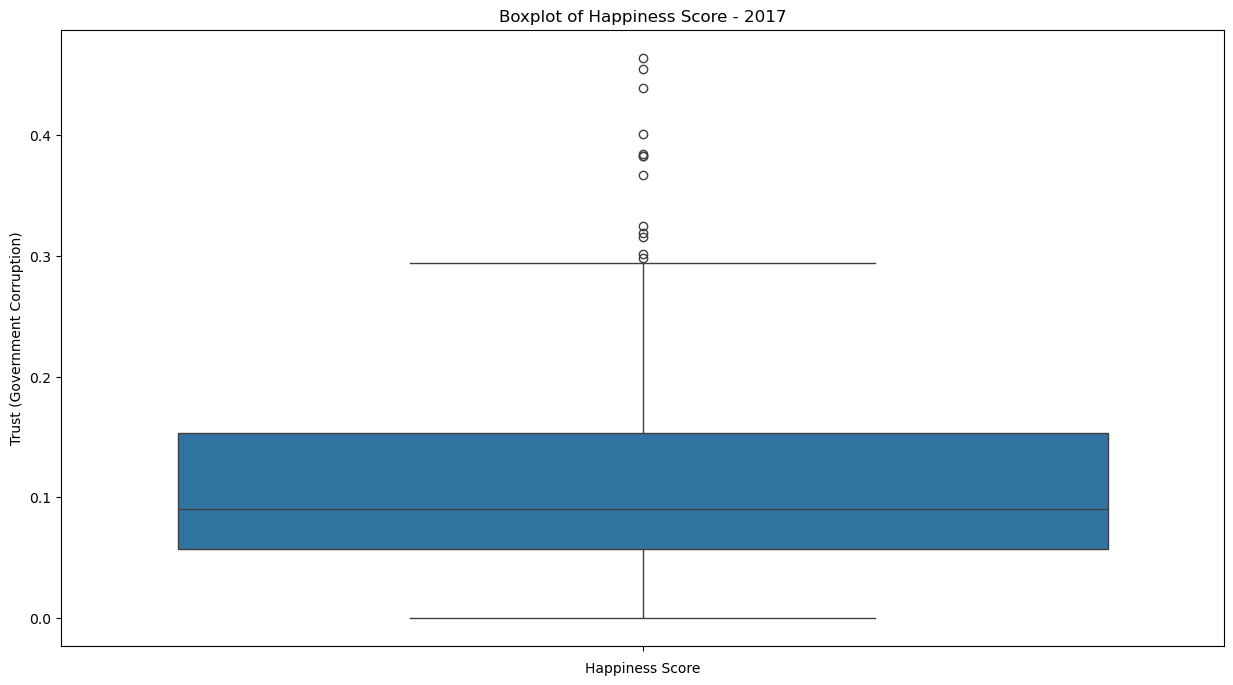

In [658]:
# Importing necessary library for visualization

plt.figure(figsize=(15,8))

sns.boxplot(
    data_2017,
    y="Trust (Government Corruption)",
)
plt.title('Boxplot of Happiness Score - 2017')
plt.xlabel('Happiness Score')
plt.show()

### Consistency: The median trust levels and IQR (middle 50% of the data) remain fairly consistent across all three years, indicating that most countries report relatively low and similar levels of trust in their governments over time.
### Outliers: There are consistent outliers across all years, but 2016 shows the highest outliers, with some trust scores reaching as high as 0.5. This suggests that while the general trust in governments remains low for most countries, a few countries have notably higher trust levels.
### Trends: The increase in the number and magnitude of outliers from 2015 to 2016 might suggest that certain countries saw significant improvements in public trust in their governments during this period, though this trend moderates slightly by 2017.

I will keep the outlier "not dealing with it"
The outliers in the Trust (Government Corruption) columns represent countries that are outliers for valid reasons, not due to errors or anomalies in data collection. These countries may have significantly higher levels of public trust or generosity due to real-world factors such as effective governance, transparency, or strong cultural norms of giving.
Removing these outliers would erase meaningful differences that reflect actual behavior in certain regions.

In [660]:
# Now applying the same IQR method for 'Generosity' column in the 2016 dataset

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Generosity' in the 2016 dataset
Q1_generosity_2016 = data_2016['Generosity'].quantile(0.25)
Q3_generosity_2016 = data_2016['Generosity'].quantile(0.75)

# Step 2: Calculate the IQR for Generosity
IQR_generosity_2016 = Q3_generosity_2016 - Q1_generosity_2016

# Step 3: Define the lower and upper bounds for Generosity
lower_bound_generosity_2016 = Q1_generosity_2016 - 1.5 * IQR_generosity_2016
upper_bound_generosity_2016 = Q3_generosity_2016 + 1.5 * IQR_generosity_2016

# Step 4: Identify the outliers in Generosity for 2016 dataset
outliers_generosity_2016 = data_2016[(data_2016['Generosity'] < lower_bound_generosity_2016) | 
                                         (data_2016['Generosity'] > upper_bound_generosity_2016)]

# Display the outliers
outliers_generosity_2016


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
29,Malta,Western Europe,30,6.488,6.409,6.567,1.30782,1.09879,0.80315,0.54994,0.17554,0.56237,1.99032
32,Thailand,Southeastern Asia,33,6.474,6.396,6.552,1.08930,1.04477,0.64915,0.49553,0.02833,0.58696,2.57960
78,Indonesia,Southeastern Asia,79,5.314,5.237,5.391,0.95104,0.87625,0.49374,0.39237,0.00322,0.56521,2.03171
118,Myanmar,Southeastern Asia,119,4.395,4.327,4.463,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971,1.50655


### There are outliers in the Generosity column for Malta, Thailand, Indonesia, and Myanmar.

###  We should not Dealing with it. These outliers represent real and meaningful data. These countries have genuinely high generosity scores due to their cultural and social values, not because of data errors. Deleting them would erase important information about how generosity varies across different countries.








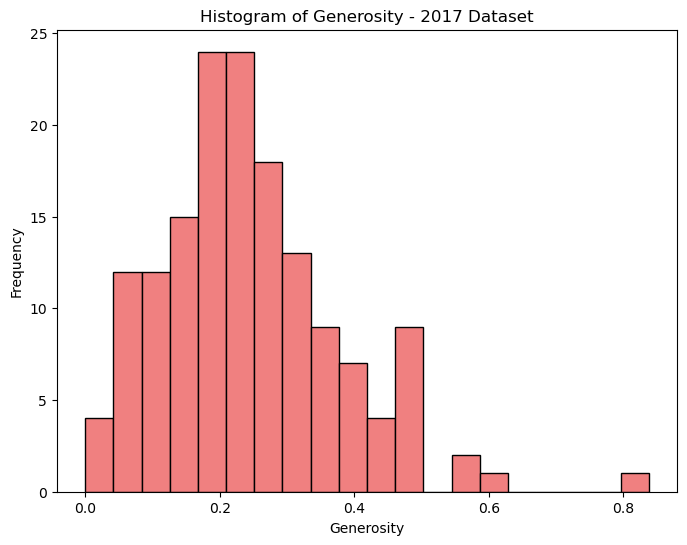

In [662]:
# Histogram for Generosity in 2017
plt.figure(figsize=(8, 6))
plt.hist(data_2017['Generosity'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Generosity - 2017 Dataset')
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.show()


# There is an outlier in the Generosity column for 2017, with a score close to 0.8, while most countries have lower values.
#  We should not Dealing with it. This outlier represents a real and meaningful difference in generosity, likely due to cultural or societal factors. It’s valuable for understanding global behavior and is not an error.

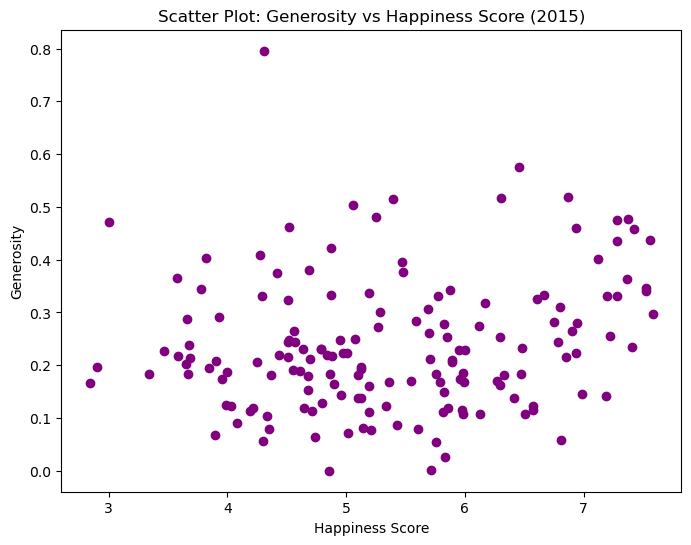

In [664]:
# Scatter Plot: Generosity vs Happiness Score for 2017
plt.figure(figsize=(8, 6))
plt.scatter(data_2015['Happiness Score'], data_2015['Generosity'], color='purple')
plt.title('Scatter Plot: Generosity vs Happiness Score (2015)')
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.show()

### There is an outlier in the Generosity column with a value close to 0.8, while most points fall below 0.6.
### We should not Dealing with it. This outlier represents a real and meaningful difference in generosity, likely due to cultural or societal factors. It is important to keep this data as it provides valuable insights and is not an error.

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [669]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [671]:
# Check for missing values in the 2017 dataset
missing_2017 = data_2017.isnull().sum()

In [672]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

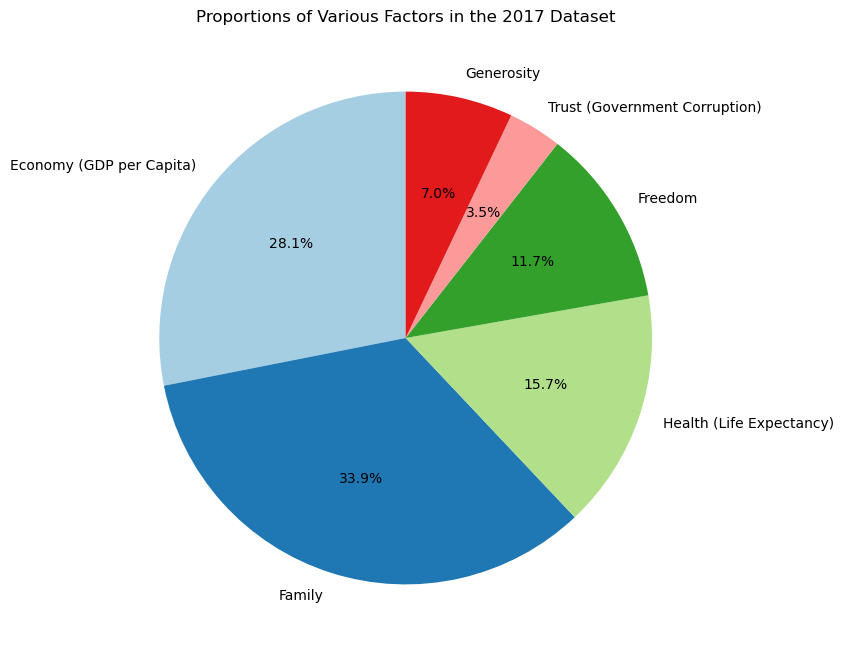

In [676]:
# Summing the columns to get their total contribution
sums = data_2017[['Economy (GDP per Capita)', 'Family', 
                  'Health (Life Expectancy)', 'Freedom', 
                  'Trust (Government Corruption)', 'Generosity']].sum()

# Labels for the pie chart
labels = sums.index

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportions of Various Factors in the 2017 Dataset')
plt.show()


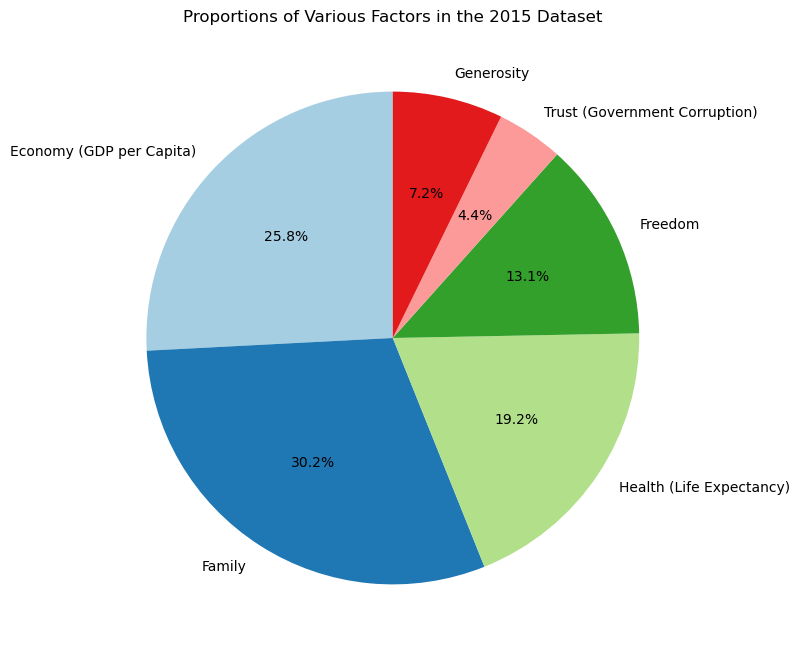

In [677]:
# Summing the columns to get their total contribution
sums = data_2015[['Economy (GDP per Capita)', 'Family', 
                  'Health (Life Expectancy)', 'Freedom', 
                  'Trust (Government Corruption)', 'Generosity']].sum()

# Labels for the pie chart
labels = sums.index

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportions of Various Factors in the 2015 Dataset')
plt.show()


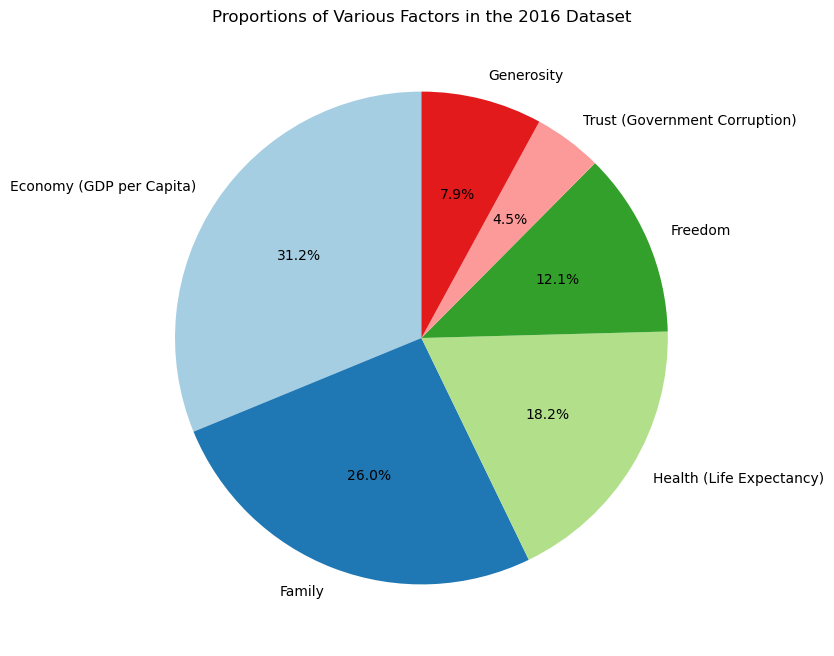

In [678]:
# Summing the columns to get their total contribution
sums = data_2016[['Economy (GDP per Capita)', 'Family', 
                  'Health (Life Expectancy)', 'Freedom', 
                  'Trust (Government Corruption)', 'Generosity']].sum()

# Labels for the pie chart
labels = sums.index

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportions of Various Factors in the 2016 Dataset')
shadow=True,
explode = [0.3,0.2]
plt.show()


### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

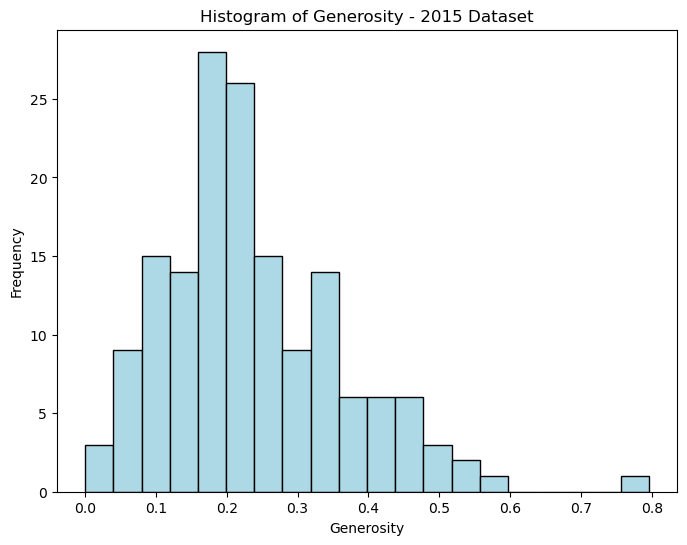

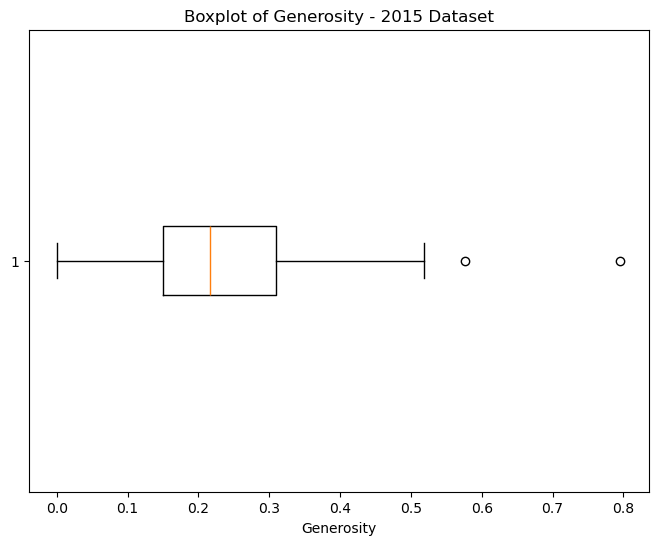

(count    158.000000
 mean       0.237296
 std        0.126685
 min        0.000000
 25%        0.150553
 50%        0.216130
 75%        0.309883
 max        0.795880
 Name: Generosity, dtype: float64,
 1.001960575563042,
 1.7465276543554147)

In [680]:
# Step 1: Descriptive statistics for Generosity in the 2017 dataset
generosity_stats = data_2015['Generosity'].describe()

# Step 2: Calculating skewness and kurtosis
generosity_skewness = data_2015['Generosity'].skew()
generosity_kurtosis = data_2015['Generosity'].kurt()

# Step 3: Visualizations
# Histogram for Generosity
plt.figure(figsize=(8, 6))
plt.hist(data_2015['Generosity'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Generosity - 2015 Dataset')
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Generosity
plt.figure(figsize=(8, 6))
plt.boxplot(data_2015['Generosity'], vert=False)
plt.title('Boxplot of Generosity - 2015 Dataset')
plt.xlabel('Generosity')
plt.show()

# Display statistics, skewness, and kurtosis
generosity_stats, generosity_skewness, generosity_kurtosis


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

# 1. What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?

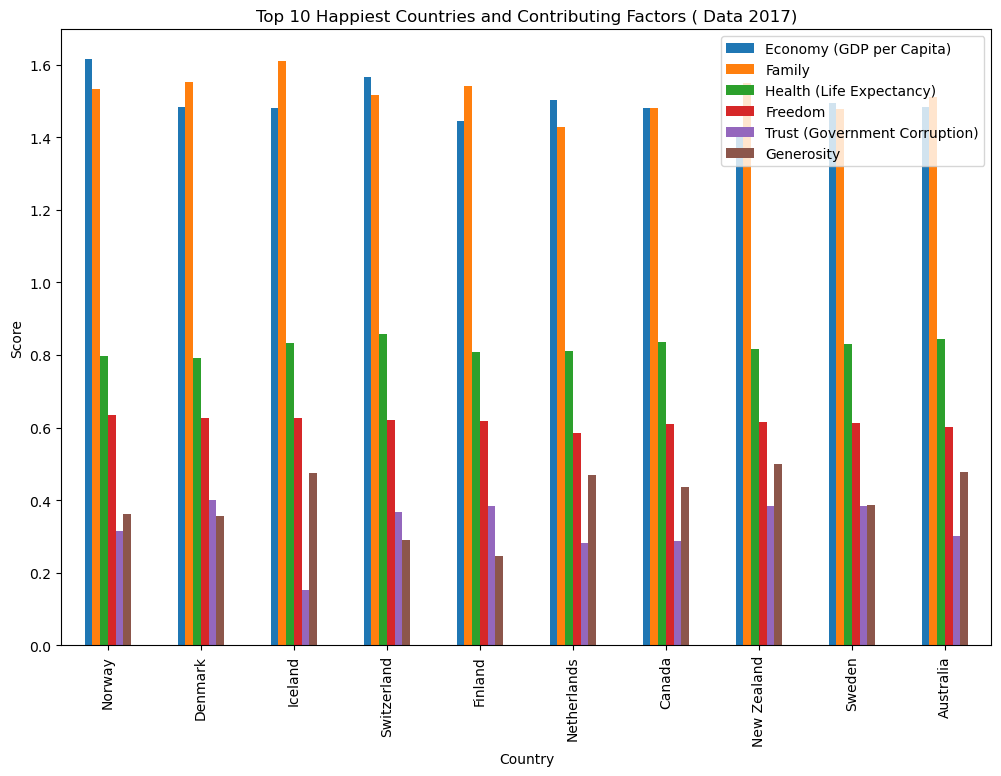

In [683]:
# Get top 10 countries by Happiness Rank
top_10_countries = data_2017.sort_values('Happiness Rank').head(10)

# Plot bar chart of the factors for top 10 happiest countries
top_10_countries.plot(x='Country', y=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                                      'Freedom', 'Trust (Government Corruption)', 'Generosity'],
                      kind='bar', figsize=(12, 8), title='Top 10 Happiest Countries and Contributing Factors ( Data 2017)')
plt.ylabel('Score')
plt.show()


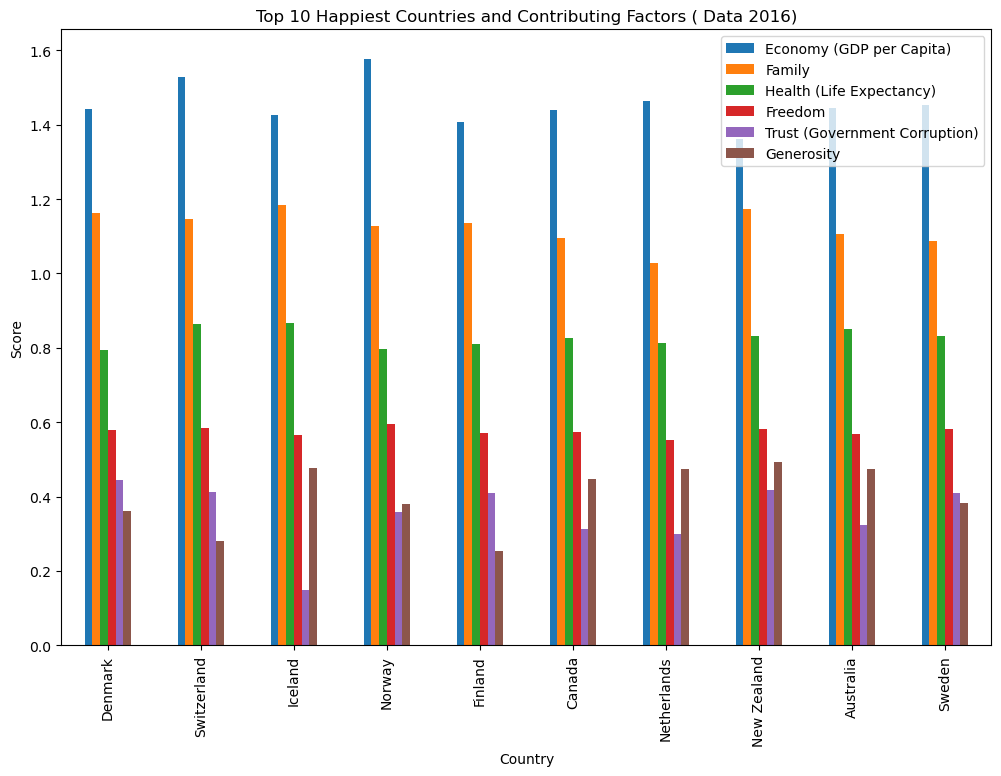

In [684]:
# Get top 10 countries by Happiness Rank
top_10_countries = data_2016.sort_values('Happiness Rank').head(10)

# Plot bar chart of the factors for top 10 happiest countries
top_10_countries.plot(x='Country', y=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                                      'Freedom', 'Trust (Government Corruption)', 'Generosity'],
                      kind='bar', figsize=(12, 8), title='Top 10 Happiest Countries and Contributing Factors ( Data 2016)')
plt.ylabel('Score')
plt.show()


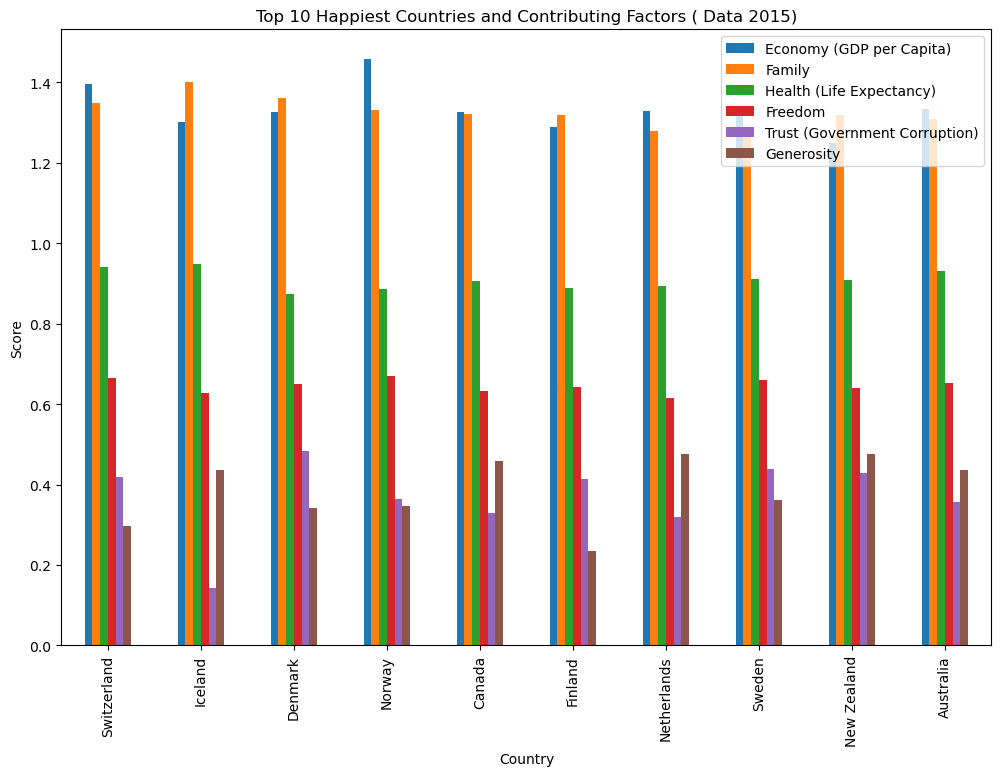

In [685]:
# Get top 10 countries by Happiness Rank
top_10_countries = data_2015.sort_values('Happiness Rank').head(10)

# Plot bar chart of the factors for top 10 happiest countries
top_10_countries.plot(x='Country', y=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                                      'Freedom', 'Trust (Government Corruption)', 'Generosity'],
                      kind='bar', figsize=(12, 8), title='Top 10 Happiest Countries and Contributing Factors ( Data 2015)')
plt.ylabel('Score')
plt.show()



# How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?

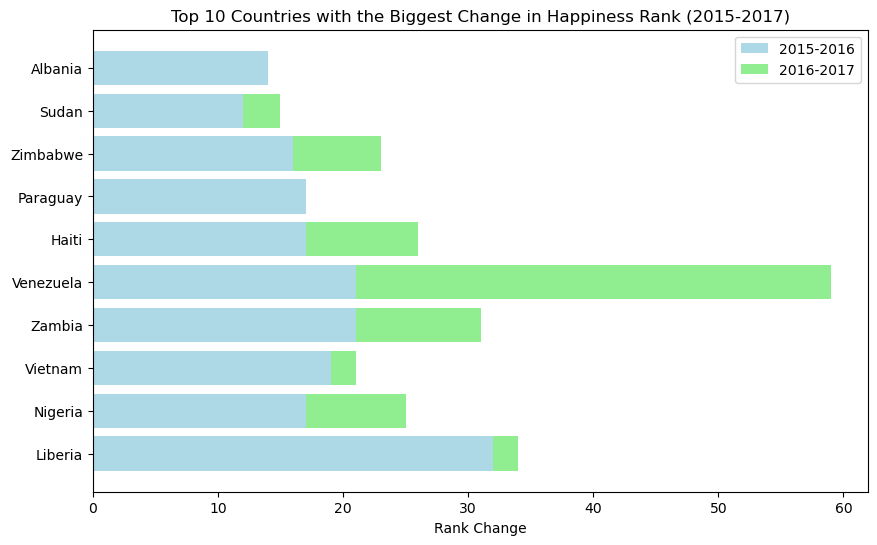

In [687]:
# Merging the 2015, 2016, and 2017 datasets by Country to compare ranks
rank_comparison = pd.merge(data_2015[['Country', 'Happiness Rank']], 
                           data_2016[['Country', 'Happiness Rank']], on='Country', suffixes=('_2015', '_2016'))
rank_comparison = pd.merge(rank_comparison, data_2017[['Country', 'Happiness Rank']], on='Country')
rank_comparison.columns = ['Country', 'Happiness Rank 2015', 'Happiness Rank 2016', 'Happiness Rank 2017']

# Calculating rank changes between the years
rank_comparison['Rank Change (2015-2016)'] = rank_comparison['Happiness Rank 2016'] - rank_comparison['Happiness Rank 2015']
rank_comparison['Rank Change (2016-2017)'] = rank_comparison['Happiness Rank 2017'] - rank_comparison['Happiness Rank 2016']

# Sorting countries by the biggest change between 2015 and 2017
rank_comparison_sorted = rank_comparison.sort_values(by='Rank Change (2015-2016)', ascending=False).head(10)

# Plotting the rank changes
plt.figure(figsize=(10, 6))
plt.barh(rank_comparison_sorted['Country'], rank_comparison_sorted['Rank Change (2015-2016)'], color='lightblue', label='2015-2016')
plt.barh(rank_comparison_sorted['Country'], rank_comparison_sorted['Rank Change (2016-2017)'], color='lightgreen', left=rank_comparison_sorted['Rank Change (2015-2016)'], label='2016-2017')
plt.xlabel('Rank Change')
plt.title('Top 10 Countries with the Biggest Change in Happiness Rank (2015-2017)')
plt.legend()
plt.show()


# Did any country experience a significant increase or decrease in happiness?

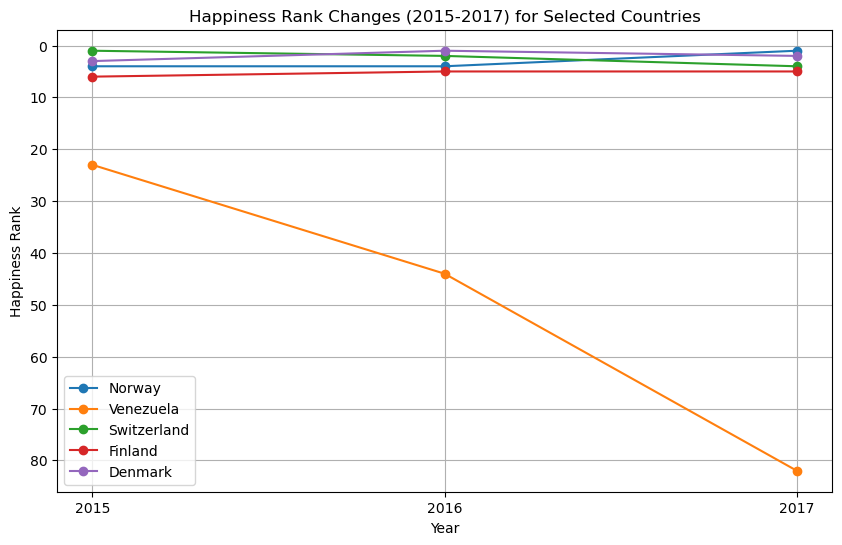

In [689]:
# Select a few key countries to plot their rank changes over time (2015, 2016, 2017)
countries_to_plot = ['Norway', 'Venezuela', 'Switzerland', 'Finland', 'Denmark']

# Filter the dataset for these countries
rank_changes_line = rank_comparison[rank_comparison['Country'].isin(countries_to_plot)]

# Plotting the line graph to show rank changes over 2015, 2016, and 2017
plt.figure(figsize=(10, 6))

for country in countries_to_plot:
    plt.plot(['2015', '2016', '2017'], 
             rank_changes_line[rank_changes_line['Country'] == country][['Happiness Rank 2015', 'Happiness Rank 2016', 'Happiness Rank 2017']].values[0],
             marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Happiness Rank')
plt.title('Happiness Rank Changes (2015-2017) for Selected Countries')
plt.gca().invert_yaxis()  # Invert y-axis to show rank 1 at the top
plt.legend()
plt.grid(True)
plt.show()


# What are the key drivers of happiness?

### is economy or family support a stronger predictor of happiness for the top-ranked countries? You could explore correlations between happiness scores and the six contributing factors to identify which ones have the strongest influence.

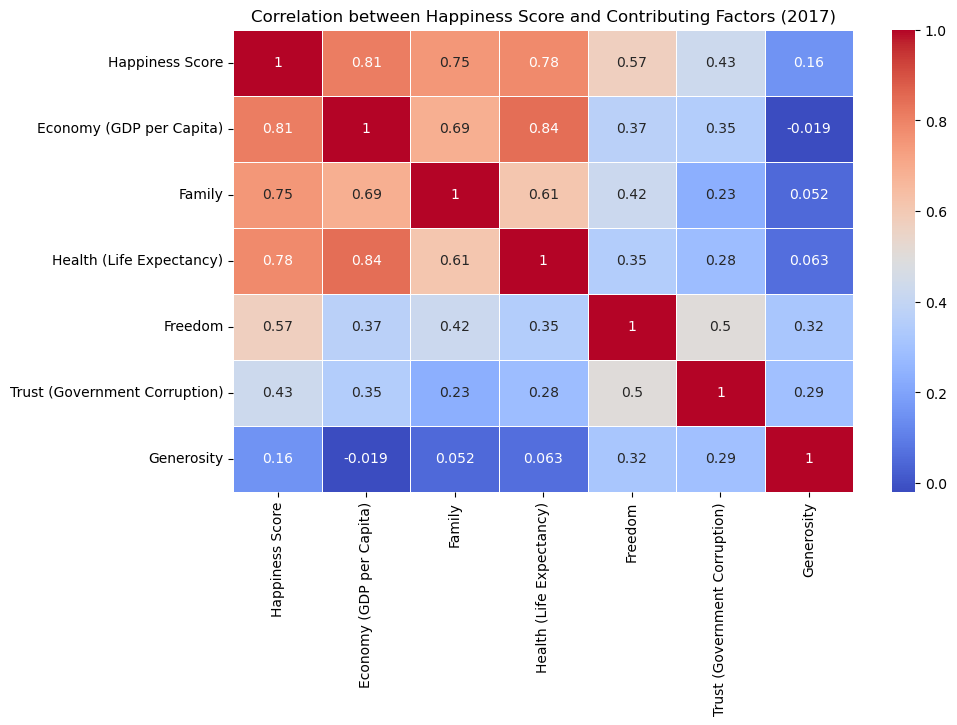

KeyError: 'Happiness.Score'

In [691]:
# Exploring the correlations between happiness scores and the six contributing factors

# Selecting the relevant columns for the analysis
columns_of_interest = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 
                       'Trust (Government Corruption)', 'Generosity']

# Calculating the correlation matrix
correlation_matrix = data_2017[columns_of_interest].corr()

# Plotting the correlation heatmap
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Happiness Score and Contributing Factors (2017)')
plt.show()

# Displaying the correlation matrix
correlation_matrix['Happiness.Score'].sort_values(ascending=False)


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.